In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
total_result = dict() # to store the result of diferent approaches 

Data Preparation

In [2]:
x_train = pd.read_csv('smoking data/competition_format/x_train.csv')
y_train = pd.read_csv('smoking data/competition_format/y_train.csv')['smoking']
x_test = pd.read_csv('smoking data/competition_format/x_test.csv')
y_test= pd.read_csv('smoking data/competition_format/y_test.csv')['smoking'].squeeze()
x_train, x_valid, y_train, y_valid = train_test_split(
                                                    x_train, 
                                                    y_train,
                                                    test_size = 0.25,
                                                    random_state = 8) 

all_data = (x_train, x_test, x_valid, y_train, y_test, y_valid)

In [5]:
# some functions 
from sklearn import preprocessing

def calculate_acc(y_pred, y_test):
      return np.mean(y_pred == y_test)


le = preprocessing.LabelEncoder()
def labalize(data):
    try:
        for column_name in data.columns:
            if data[column_name].dtype == object:
                data[column_name] = le.fit_transform(data[column_name])
            else:
                pass
    except:
        pass
[labalize(d) for d in all_data]
    


[None, None, None, None, None, None]

In [24]:
x_test.shape, x_test.shape, x_valid.shape,y_test.shape, y_test.shape, y_valid.shape, 
x_test

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,8,1,80,160,65,91.0,0.9,0.7,1.0,1.0,...,94.0,14.5,1.0,1.0,29.0,19.0,39.0,0,0.0,0
1,17,1,30,165,90,98.0,1.5,1.5,1.0,1.0,...,165.0,15.6,1.0,0.9,20.0,37.0,34.0,0,0.0,0
2,20,1,40,170,75,81.0,1.5,1.5,1.0,1.0,...,98.0,16.4,1.0,0.7,25.0,32.0,73.0,0,0.0,0
3,24,1,35,175,70,80.0,1.0,1.0,1.0,1.0,...,160.0,15.3,1.0,0.7,30.0,55.0,50.0,0,0.0,0
4,25,1,35,160,75,93.0,1.0,1.2,1.0,1.0,...,132.0,14.7,1.0,1.1,35.0,58.0,56.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1.0,1
11135,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0.0,1
11136,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0.0,0
11137,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0.0,0


#1 Desicion Tree

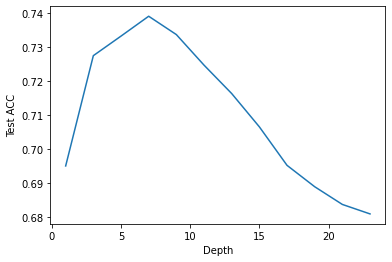

In [6]:
from sklearn.tree import DecisionTreeClassifier

# hyperparameter tuning
depths = range(1 , 25, 2)
depth_mae = dict()
for depth in depths:
  clf = DecisionTreeClassifier(max_depth = depth)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_valid)
  acc = calculate_acc(y_pred, y_valid)
  depth_mae[depth] = acc
plt.plot(list(depth_mae.keys()), list(depth_mae.values()))
plt.xlabel('Depth')
plt.ylabel('Test ACC')

# usage
best_max_depth = max(depth_mae, key = depth_mae.get)
clf = DecisionTreeClassifier(max_depth = best_max_depth )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = calculate_acc(y_pred, y_test)

total_result['decision_tree'] = acc


#2 KNN

100%|██████████| 20/20 [01:32<00:00,  4.61s/it]


31


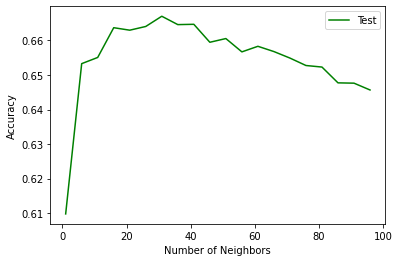

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Tuning hyperparameter k
acc_train = []
k_scores = {}
k_range = range(1, 100, 5)
for k in tqdm(k_range):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)
  k_scores[k] = clf.score(x_valid, y_valid)
  
# plot
plt.plot(k_scores.keys(), k_scores.values(), 'g')
plt.legend(['Test'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# usage
best_k = max(k_scores, key=k_scores.get)
print(best_k)
clf = KNeighborsClassifier(n_neighbors= best_k)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

total_result['knn'] = score



#3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.fit_transform(x_test)

c_scores = dict()
# hype tunning and plot
for c in range(1,20):
  clf = LogisticRegression(C= c )
  clf.fit(x_train, y_train)
  score = clf.score(x_valid, y_valid)
  c_scores[c] = score
  
#TODO:
plt.plot(c_scores.keys(), c_scores.values() , 'g')
plt.legend(['Test'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')


# usage
best_c = max(c_scores, key = c_scores.get)
clf = LogisticRegression(C = best_c)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test) 
total_result['Logistic_Regression'] = score




#4 SVM

In [9]:
from sklearn.svm import SVC
c_arr = [0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]
train_acc = []
test_acc = []
hyperpara = {}
# for C in tqdm(c_arr):
    
#     svc = SVC(C=C)
#     svc.fit(x_train, y_train)

#     # train_acc.append(svc.score(x_valid, y_valid))
#     score = svc.score(x_valid, y_valid)
#     type(score)
#     test_acc.append(score)
#     hyperpara[C] = score

# usage 
svm = SVC()
svm.fit(x_train, y_train)
score = svm.score(x_test, y_test)

total_result['SVM'] = score

#5 Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_valid)
# total_true = int((y_test != y_pred).sum())
len_train  = x_test.shape[0]
total_trues = (y_valid != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d"
      % (len_train, total_trues))
total_result['Naive_Bayes'] = (len_train - total_trues) / len_train 
total_result




Number of mislabeled points out of a total 11139 points : 3318


{'decision_tree': 0.7559924589280905,
 'knn': 0.6618188347248406,
 'Logistic_Regression': 0.7003321662626807,
 'SVM': 0.6316545470868121,
 'Naive_Bayes': 0.7021276595744681,
 'Random_Forest': 0.9312326061585421,
 'Random Forest': 0.8801508214381901,
 'Adaboost': 0.7583266002334141,
 'LightGBM': 0.8050992010054763}

#6 Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_valid, y_valid)
total_result['Random_Forest'] = clf.score(x_test, y_test)


Text(0, 0.5, 'Accuracy')

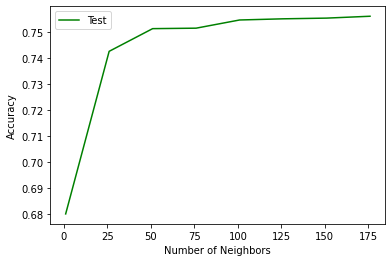

In [12]:
# hyper parameter : n_estiamtors (the number of trees)
trees = []
n_scores = {}
for i in range(1, 200, 25 ):
    clf = RandomForestClassifier(random_state=0, n_estimators = i)
    clf.fit(x_train, y_train)
    score = clf.score(x_valid, y_valid)
    n_scores[i] = score 

# plot 
#TODO:
plt.plot(n_scores.keys(), n_scores.values() , 'g')
plt.legend(['Test'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
# usage 





In [13]:
best_n = max(c_scores, key = c_scores.get)
clf = RandomForestClassifier(random_state=0, n_estimators = best_n)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test) 
total_result['Random Forest'] = score

#7 Adaboost

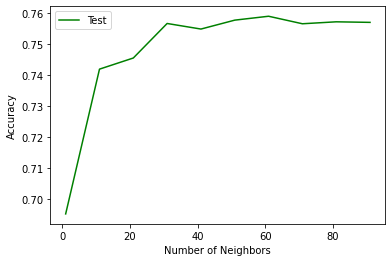

In [17]:
from sklearn.ensemble import AdaBoostClassifier
#train 


# hyper parameter 

n_scores = {}
for i in range(1, 100, 10 ):
    clf = AdaBoostClassifier(n_estimators = i )
    clf.fit(x_train, y_train)
    score = clf.score(x_valid, y_valid)
    n_scores[i] = score 

# plot 
#TODO:
plt.plot(n_scores.keys(), n_scores.values() , 'g')
plt.legend(['Test'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
# usage 
# use
best_n = max(n_scores , key = n_scores.get)
clf = AdaBoostClassifier(n_estimators = best_n )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
score = calculate_acc(y_pred, y_valid)
total_result['Adaboost'] = score


#8 LightGBM

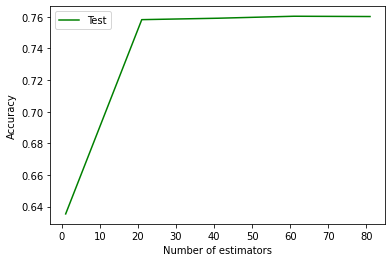

In [18]:
from lightgbm import LGBMClassifier
n_scores = {}
for i in range(1, 100, 20 ):
    clf = LGBMClassifier(n_estimators = i )
    clf.fit(x_train, y_train)
    score = clf.score(x_valid, y_valid)
    n_scores[i] = score 

# plot 
#TODO:
plt.plot(n_scores.keys(), n_scores.values() , 'g')
plt.legend(['Test'])
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
# usage 

clf = LGBMClassifier(n_estimators = best_n)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
score = calculate_acc(y_pred, y_test)
total_result['LightGBM'] = score

Final Resuult

In [21]:
total_result

{'decision_tree': 0.7559924589280905,
 'knn': 0.6618188347248406,
 'Logistic_Regression': 0.7003321662626807,
 'SVM': 0.6316545470868121,
 'Naive_Bayes': 0.7021276595744681,
 'Random Forest': 0.8801508214381901,
 'Adaboost': 0.7588652482269503,
 'LightGBM': 0.7884011132058533}

In [22]:
excel_data = {'classification Method':total_result.keys(), 'accuracy':total_result.values() }
df = pd.DataFrame(data = excel_data ).to_excel('result.xlsx')


<BarContainer object of 8 artists>

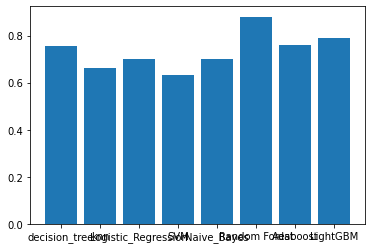

In [23]:
plt.bar(total_result.keys(), total_result.values())